In [1]:
import matplotlib.pyplot as plt       
plt.style.use('classic')
import numpy as np

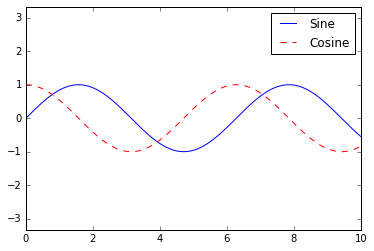

In [2]:
x = np.linspace(0, 10, 1000)       
fig, ax = plt.subplots()       
ax.plot(x, np.sin(x), '-b', label='Sine')       
ax.plot(x, np.cos(x), '--r', label='Cosine')       
ax.axis('equal')       
leg = ax.legend();

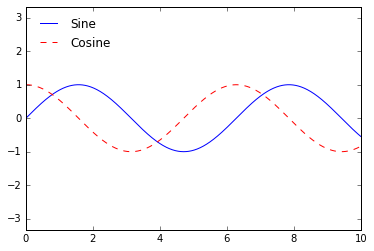

In [3]:
ax.legend(loc='upper left', frameon=False)       
fig

ncol command to specify the number of columns in the legend

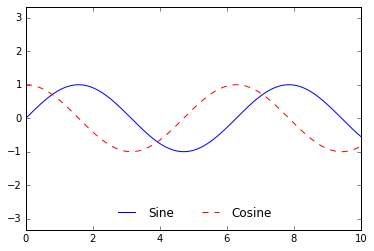

In [4]:
ax.legend(frameon=False, loc='lower center', ncol=2)       
fig

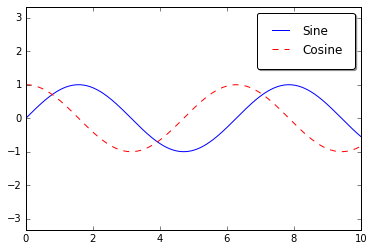

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)       
fig

The plt.plot() command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to plt.legend() will tell it which to identify, along with the labels we’d like to specify

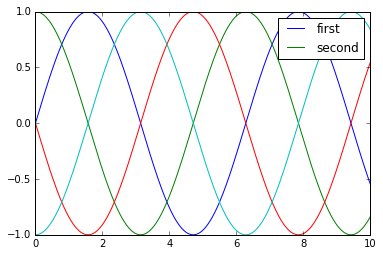

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))       
lines = plt.plot(x, y)
# lines is a list of plt.Line2D instances       
plt.legend(lines[:2], ['first', 'second'])

applying labels to the plot elements you’d like to show on the legend:

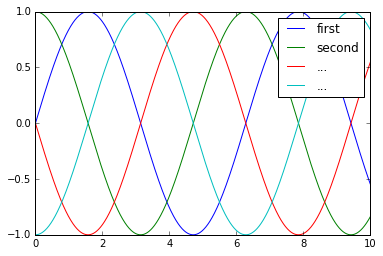

In [8]:
plt.plot(x, y[:, 0], label='first')       
plt.plot(x, y[:, 1], label='second')       
plt.plot(x, y[:, 2:], label='...')       
plt.legend(framealpha=1, frameon=True);

the legend ignores all elements without a label attribute set

clim sets the color limits of the current image


syntax: clim(vmin=None, vmax=None)

If either vmin or vmax is None, the image min/max respectively will be used for color scaling.
If you want to set the clim of multiple images, use set_clim on every image

The legend will always reference some object that is on the plot, so if we’d like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists. 

legend only lists plot elements that have a label specified

By plotting empty lists, we create labeled plot objects that are picked up by the legend

# Multiple Legends

Sometimes when designing a plot you’d like to add multiple legends to the same axes. Unfortunately, Matplotlib does not make this easy: via the standard legend interface, it is only possible to create a single legend for the entire plot. If you try to create a second legend using plt.legend() or ax.legend(), it will simply override the first one. We can work around this by creating a new legend artist from scratch, and then using the lower-level ax.add_artist() method to manually add the second artist to the plot 

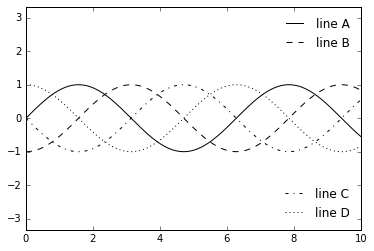

In [9]:
fig, ax = plt.subplots()
lines = []       
styles = ['-', '--', '-.', ':']       
x = np.linspace(0, 10, 1000)

for i in range(4):           
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')       

ax.axis('equal')

# specify the lines and labels of the first legend       
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# Create the second legend and add the artist manually.       
from matplotlib.legend import Legend       

leg = Legend(ax, lines[2:], ['line C', 'line D'],loc='lower right', frameon=False)       
ax.add_artist(leg);